In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import quandl as data
import pandas_datareader as pdr

In [34]:
start='2010-01-01'
end='2023-01-01'

df=data.get('WIKI/TSLA',start_date=start,end_date=end)

In [35]:
df.reset_index(inplace=True)

In [36]:
df.drop(['Date','Ex-Dividend','Split Ratio','Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume'],axis=1,inplace=True)

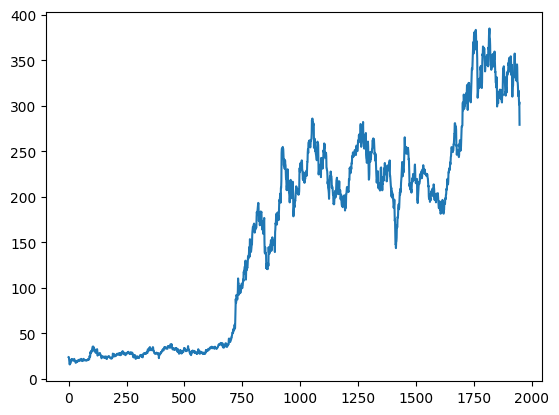

In [37]:
plt.plot(df['Close'])

In [38]:
ma100=df['Close'].rolling(100).mean()


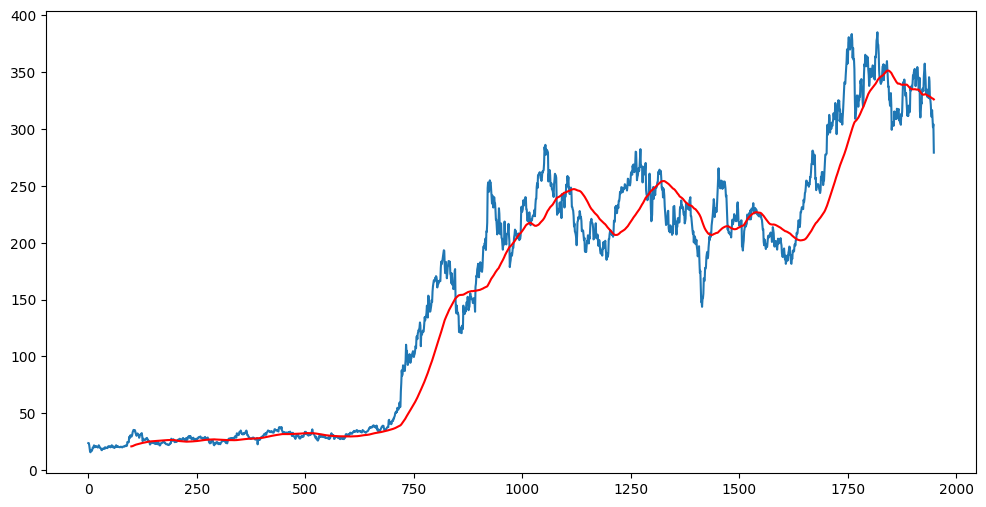

In [39]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ma100,'r')

In [40]:
ma200=df['Close'].rolling(200).mean()


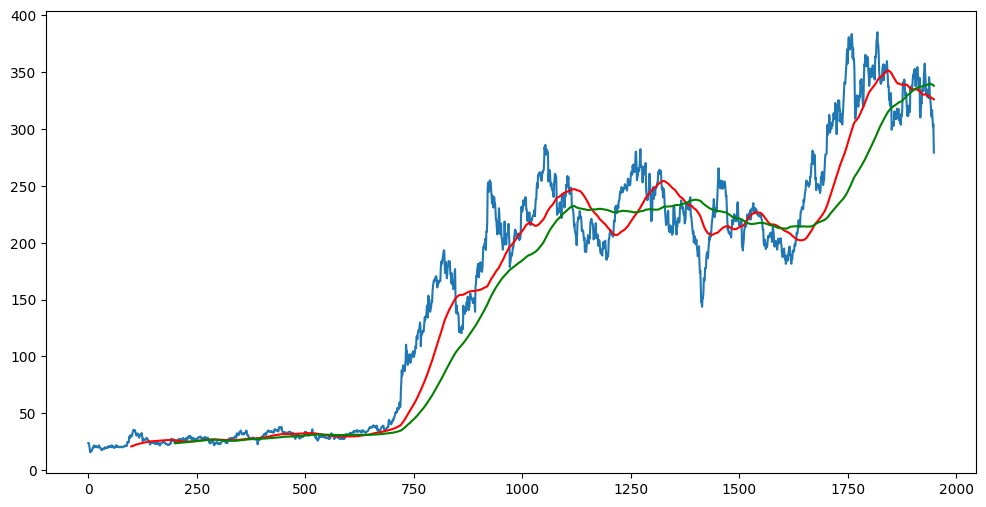

In [42]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [47]:
#Splitting into training and testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])


,Close
1364,231.61
1365,230.26
1366,237.19
1367,231.99
1368,232.71


In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [49]:
data_training_array=scaler.fit_transform(data_training)

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.7472987 ],
       [0.7491489 ],
       [0.79129663]])

In [53]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)


((1264, 100, 1), (1264,))

In [55]:
#ML model
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

model=Sequential()

model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,activation='relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))




In [58]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
40/40 [==============================] - 6s 105ms/step - loss: 0.0776
Epoch 2/50
40/40 [==============================] - 4s 104ms/step - loss: 0.0137
Epoch 3/50
40/40 [==============================] - 4s 109ms/step - loss: 0.0103
Epoch 4/50
40/40 [==============================] - 4s 107ms/step - loss: 0.0091
Epoch 5/50
40/40 [==============================] - 4s 109ms/step - loss: 0.0083
Epoch 6/50
40/40 [==============================] - 4s 108ms/step - loss: 0.0098
Epoch 7/50
40/40 [==============================] - 4s 107ms/step - loss: 0.0084
Epoch 8/50
40/40 [==============================] - 4s 111ms/step - loss: 0.0075
Epoch 9/50
40/40 [==============================] - 4s 106ms/step - loss: 0.0075
Epoch 10/50
40/40 [==============================] - 4s 108ms/step - loss: 0.0077
Epoch 11/50
40/40 [==============================] - 4s 108ms/step - loss: 0.0087
Epoch 12/50
40/40 [==============================] - 4s 108ms/step - loss: 0.0068
Epoch 13/50
40/40 [======

In [59]:
model.save('keras_model.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [60]:
data_testing.head()

,Close
1364,231.61
1365,230.26
1366,237.19
1367,231.99
1368,232.71


In [80]:
past_100_days=data_training.tail(100)


<class 'pandas.core.frame.DataFrame'>


In [82]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [83]:
final_df.head()

,Close
0,254.96
1,257.92
2,259.15
3,262.16
4,265.65


In [86]:
input_data=scaler.fit_transform(final_df)

In [87]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [89]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(585, 100, 1)
(585,)


In [90]:
#Prediction
y_predicted=model.predict(x_test)

19/19 [==============================] - 1s 28ms/step


In [94]:
scaler.scale_

array([0.0041437])

In [95]:
scale_factor=1/0.0041437
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

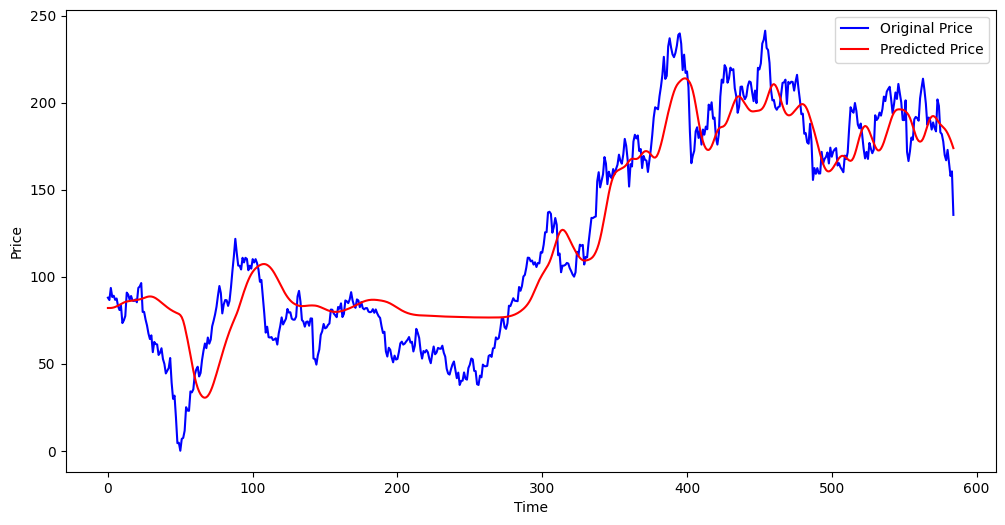

In [96]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()